In [134]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns

# %config InlineBackend.figure_format = 'retina'
# plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [167]:
def precis(data, show_hist=False):
    if show_hist:
        plt.hist(data, int(np.sqrt(len(data)).round()))
    return f'Mean: {np.mean(data)}, std: {np.std(data)}, 5.5%: {np.percentile(data, 5.5)}, 94.5%: {np.percentile(data, 94.5)}'

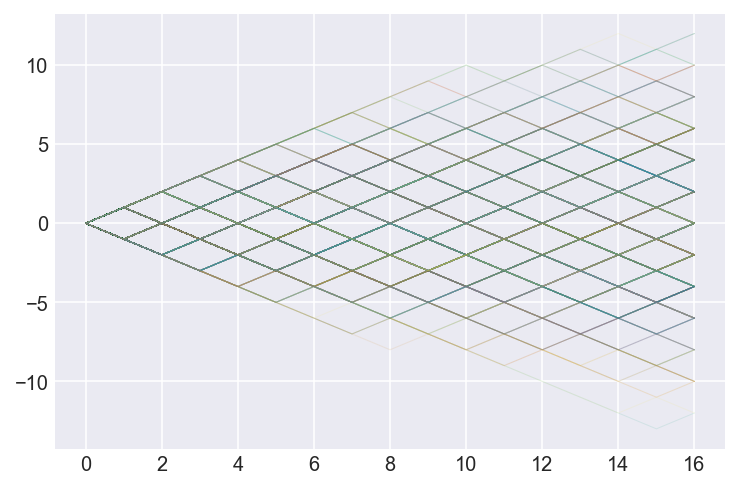

In [86]:
#just an exercise to basically replicate the binomial distribution, I think.
def walk_int_steps(max_steps, trials):
    current_trial = 0
    steps = [i for i in range(max_steps+1)]
    #steps_list = []
    #steps_list.extend(steps*trials)
    position_list = []
    while current_trial < trials:
        position = [0]
        current_step = 1
        while current_step < max_steps + 1:
            if np.random.random() >= 0.5:
                position.append(position[current_step - 1] + 1)
            else:
                position.append(position[current_step - 1] - 1)
            current_step += 1
        position_list.extend([position])
        current_trial += 1
        
    return steps, position_list

steps, position_list = walk_int_steps(16, 1000)

k = 0
while k<len(position_list):
    plt.plot(steps, position_list[k], linewidth=0.5, alpha=0.1)
    k += 1

plt.show()

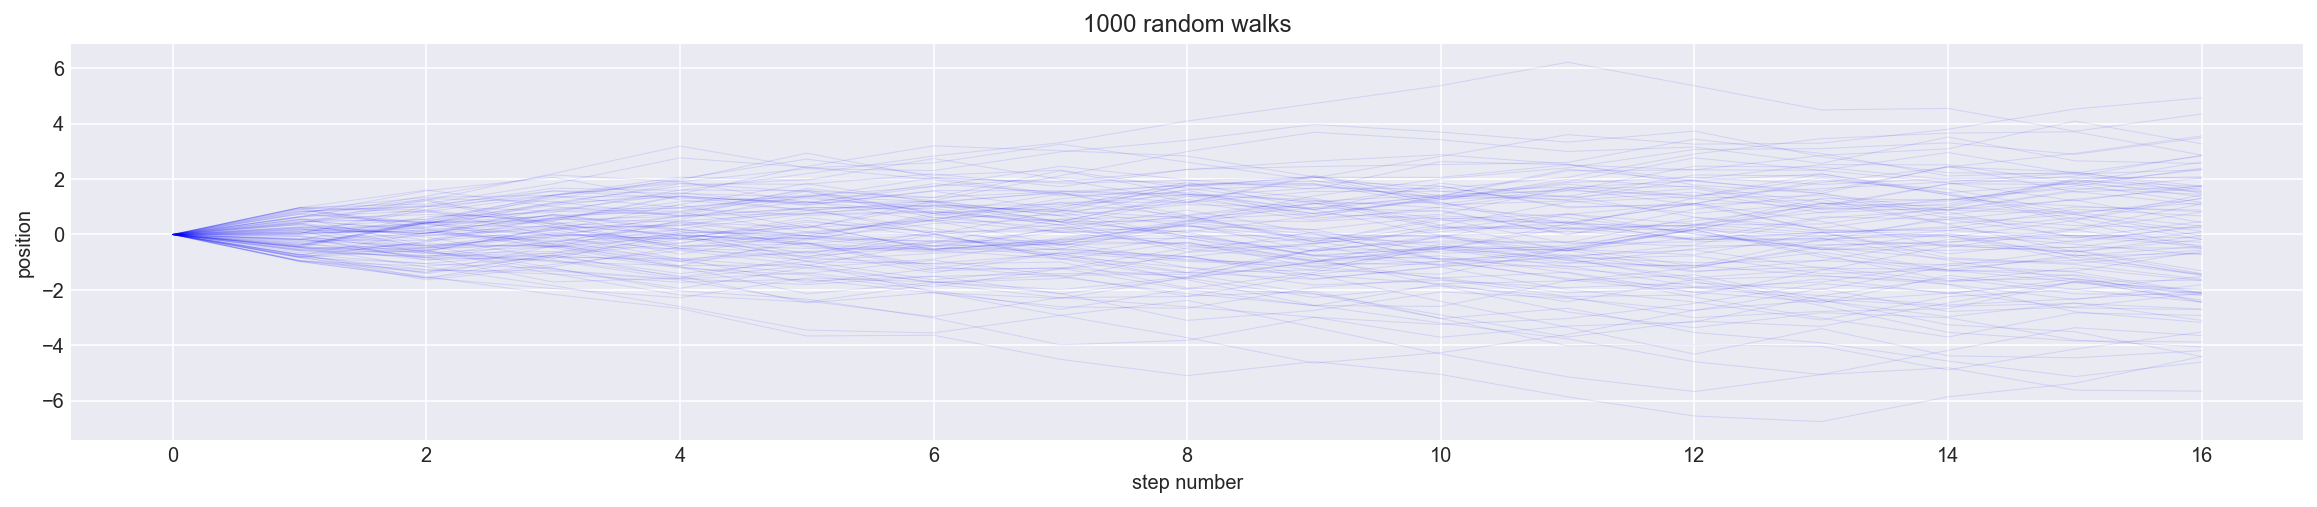

In [102]:
#just an exercise to basically replicate the binomial distribution, I think.
def walk_cont_steps(max_steps, trials):
    current_trial = 0
    steps = [i for i in range(max_steps+1)]
    #steps_list = []
    #steps_list.extend(steps*trials)
    position_list = []
    while current_trial < trials:
        position = [0]
        current_step = 1
        while current_step < max_steps + 1:
            x = np.random.uniform(-1,1)
            position.append(position[current_step - 1] + x)
            current_step += 1
        position_list.extend([position])
        current_trial += 1
        
    return steps, position_list

steps, position_list = walk_cont_steps(16, 100)

fig_1 = plt.figure(2, figsize=(20, 8))

chart_1 = fig_1.add_subplot(211)
k = 0
while k<len(position_list):
    chart_1.plot(steps, position_list[k], linewidth=0.5, alpha=0.1, color='b')
    k += 1
chart_1.set_ylabel('position')
chart_1.set_xlabel('step number')
chart_1.set_title("1000 random walks")

plt.show()

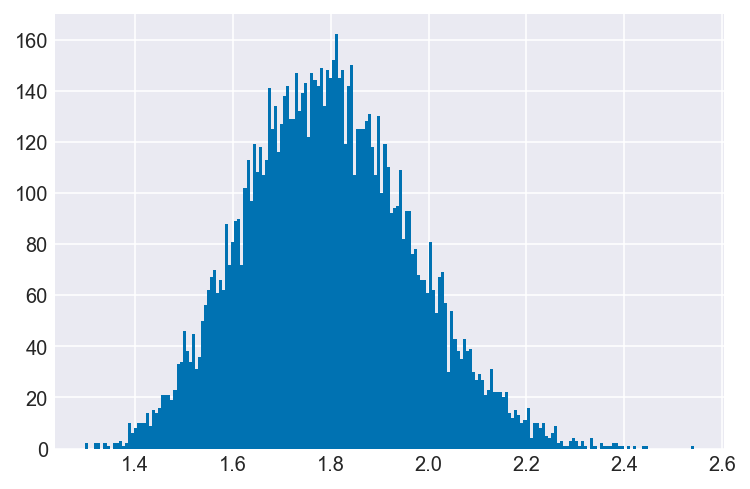

In [116]:
#R code 4.2, 4.3, 4.4
values = []
for i in range(10000):
    values.append(np.prod([1+np.random.uniform(0, 0.1, size=12)]))
plt.hist(values, bins = 200)

plt.show()

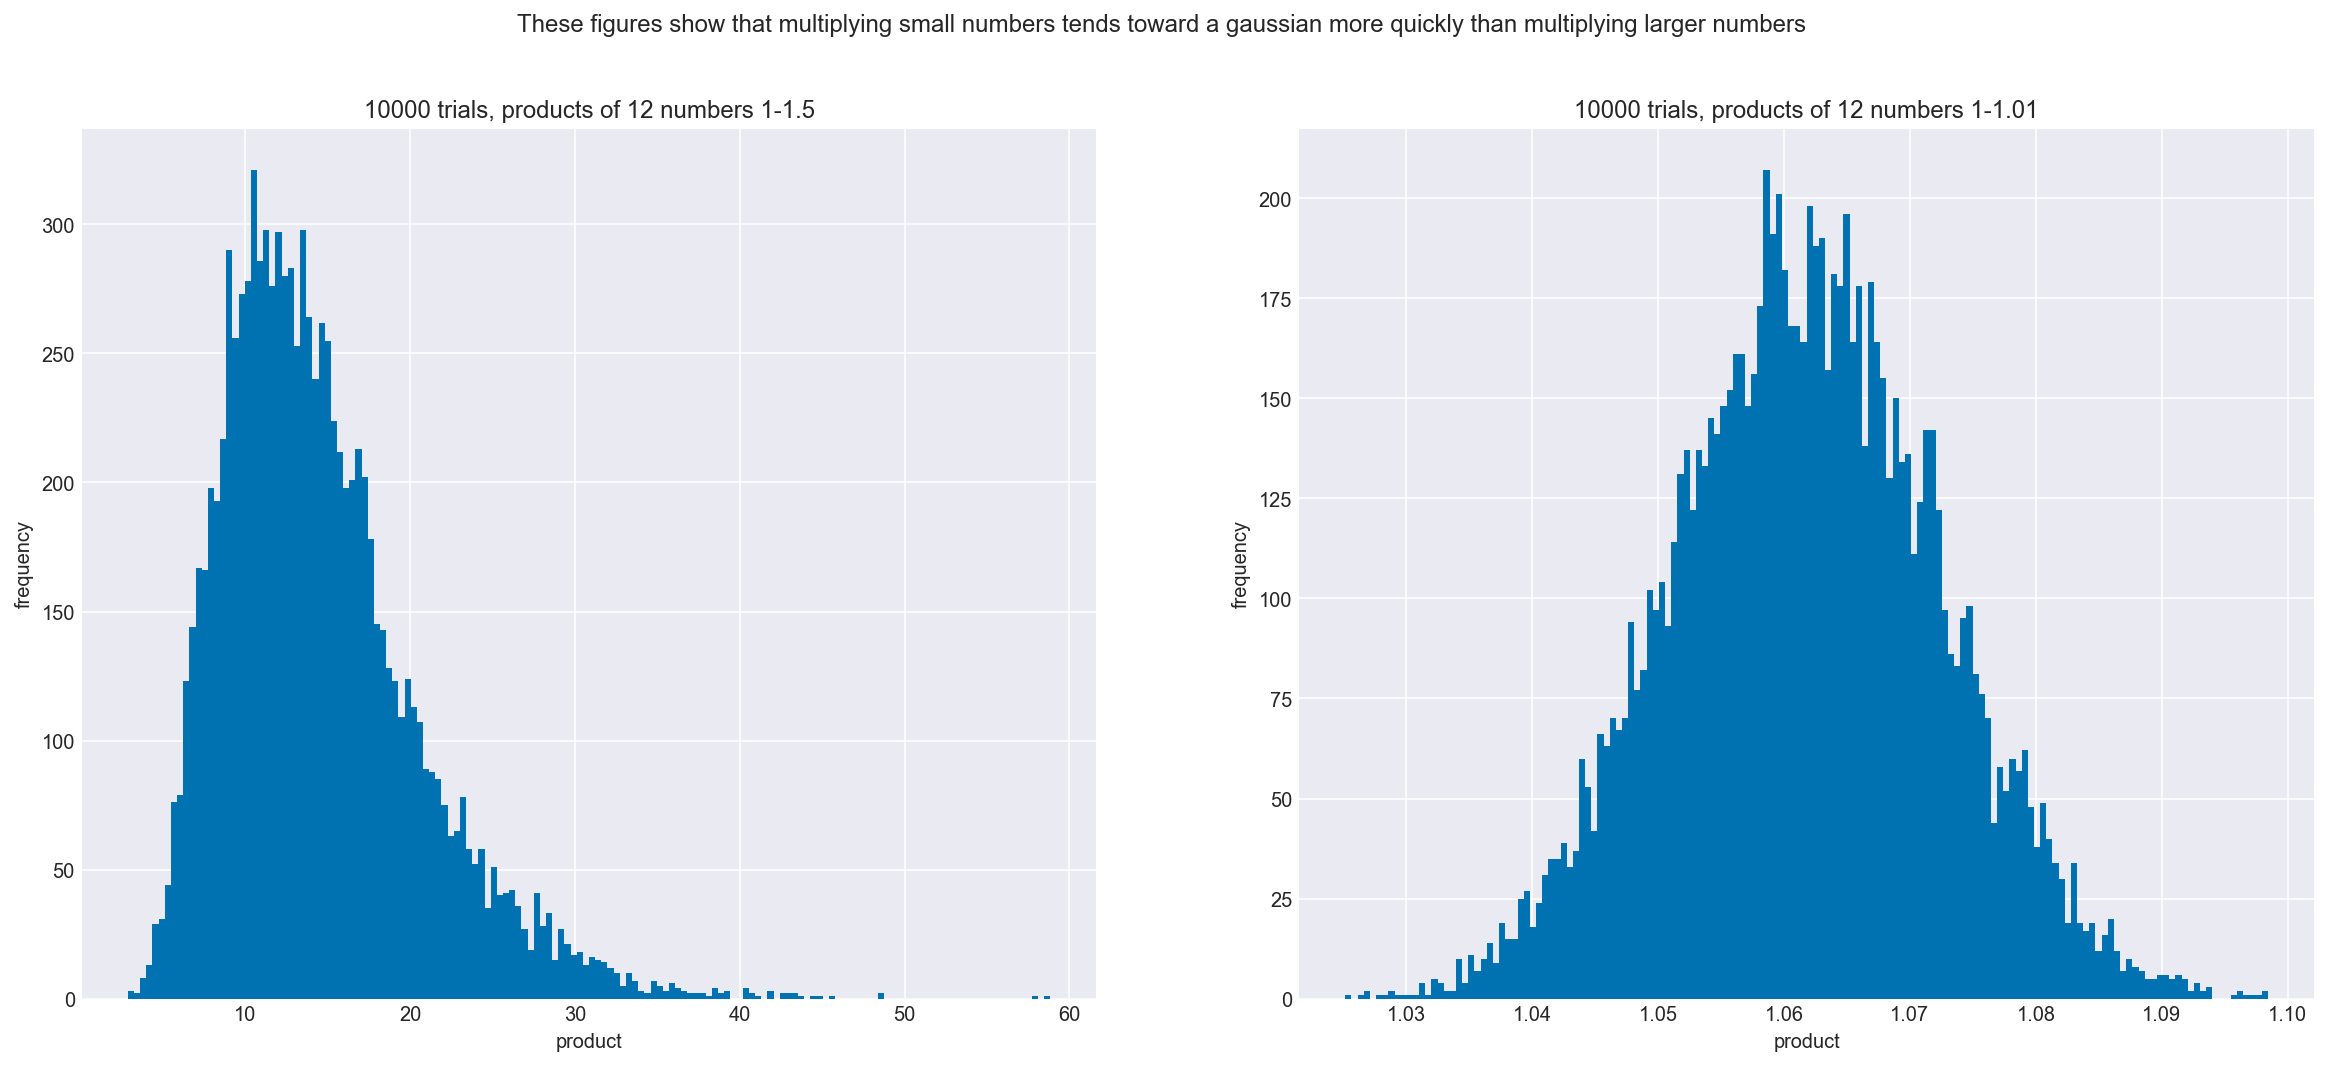

In [126]:
#R code 4.4
fig_2 = plt.figure(2, figsize=(20, 8))
values_big = []
values_small = []
for i in range(10000):
    values_big.append(np.prod([1+np.random.uniform(0, 0.5, size=12)]))
    values_small.append(np.prod([1+np.random.uniform(0, 0.01, size=12)]))
chart_3 = fig_2.add_subplot(121)
chart_3.hist(values_big, bins = 150)
chart_3.set_ylabel('frequency')
chart_3.set_xlabel('product')
chart_3.set_title("10000 trials, products of 12 numbers 1-1.5")

chart_4 = fig_2.add_subplot(122)
chart_4.hist(values_small, bins = 150)
chart_4.set_ylabel('frequency')
chart_4.set_xlabel('product')
chart_4.set_title("10000 trials, products of 12 numbers 1-1.01")

fig_2.suptitle('These figures show that multiplying small numbers tends toward a gaussian more quickly '
               'than multiplying larger numbers')
plt.show()

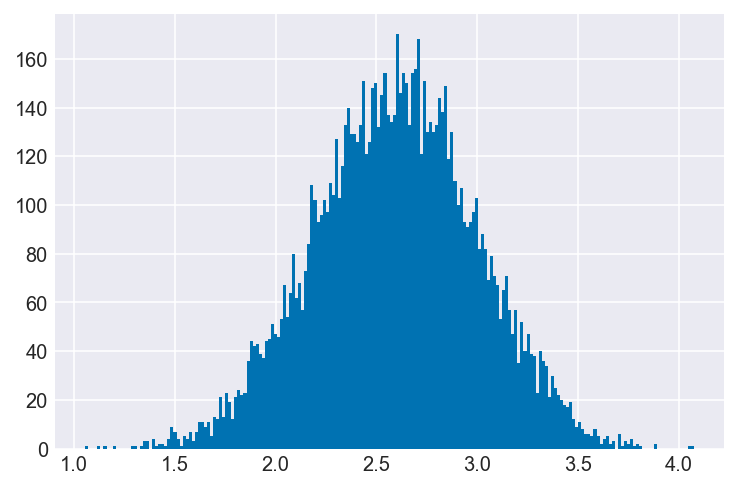

In [132]:
#R code 4.5
log_values_big = [np.log(i) for i in values_big]
plt.hist(log_values_big, bins = 200)
plt.show()


In [ ]:
#R code 4.6 - skipping this as it's literally a rehash of chapter 3 in an attempt to familiarize readers
#with Bayes' theorem and calculus, I guess

In [138]:
#R code 4.7
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

In [139]:
#R code 4.8
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


'Mean: 138.26359632352944, std: 27.57706607414806, 5.5%: 81.10855000000001, 94.5%: 165.735'

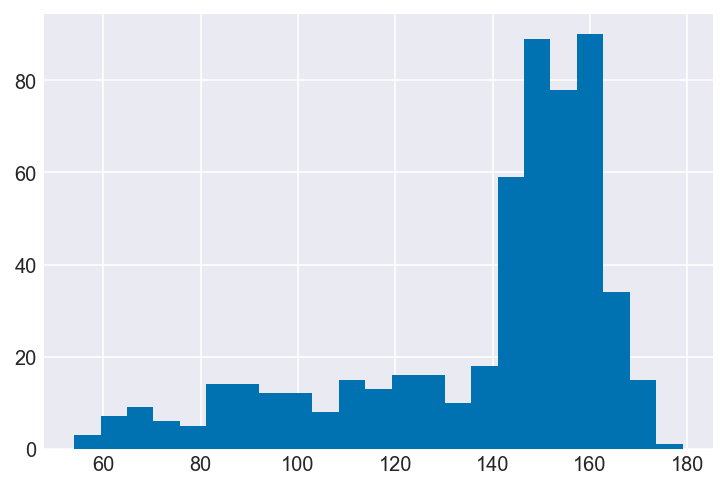

In [168]:
#R code 4.9
#I can't figure out a way to get the histogram like he has it in R
precis(d.height, True)

In [169]:
#R code 4.10
d.height

0      151.7650
1      139.7000
2      136.5250
3      156.8450
4      145.4150
5      163.8300
6      149.2250
7      168.9100
8      147.9550
9      165.1000
10     154.3050
11     151.1300
12     144.7800
13     149.9000
14     150.4950
15     163.1950
16     157.4800
17     143.9418
18     121.9200
19     105.4100
20      86.3600
21     161.2900
22     156.2100
23     129.5400
24     109.2200
25     146.4000
26     148.5900
27     147.3200
28     137.1600
29     125.7300
         ...   
514    151.7650
515    148.5900
516    153.6700
517     53.9750
518    146.6850
519     56.5150
520    100.9650
521    121.9200
522     81.5848
523    154.9400
524    156.2100
525    132.7150
526    125.0950
527    101.6000
528    160.6550
529    146.0500
530    132.7150
531     87.6300
532    156.2100
533    152.4000
534    162.5600
535    114.9350
536     67.9450
537    142.8750
538     76.8350
539    145.4150
540    162.5600
541    156.2100
542     71.1200
543    158.7500
Name: height, Length: 54

In [178]:
#R code 4.11
d2 = d[(d.age > 18)]
#plot of height done with sns.kdeplot(d2.height)

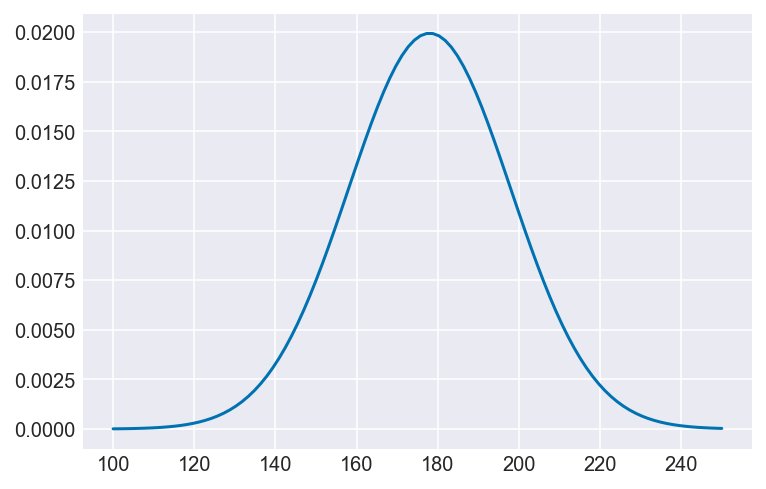

In [183]:
#R code 4.12
x1 = np.linspace(100, 250, 100)
plt.plot(x1, stats.norm.pdf(x, 178, 20));

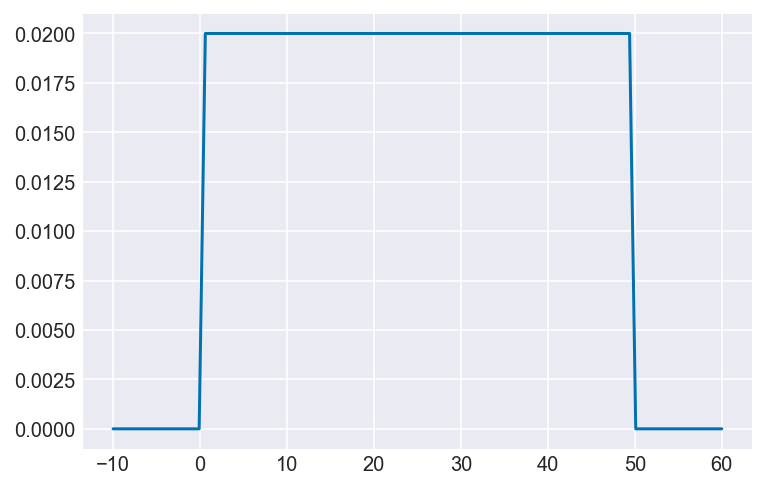

In [185]:
#R code 4.13
x2 = np.linspace(-10, 60, 100)
plt.plot(x2, stats.uniform.pdf(x2, 0, 50));

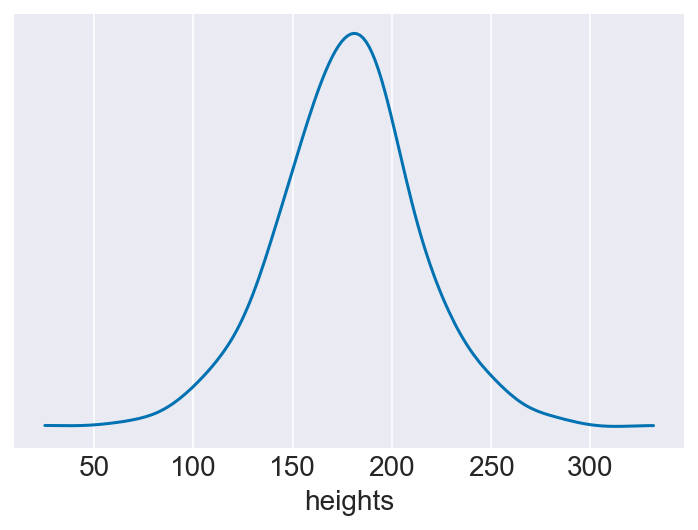

In [190]:
#R code 4.14
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples) #choose a random value for the mean, distributed normally
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples) #choose a random value for the standard deviation, with uniform distribution
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma) #construct a prior based on those choices
pm.kdeplot(prior_h) #plot the prior
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

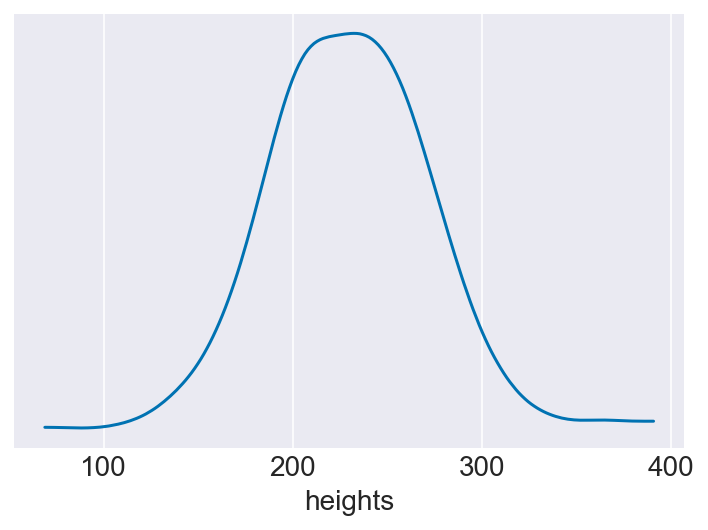

In [193]:
#R code 4.15
#same steps as above, but with a different distribution for mean (uniform instead of normal)
n_samples = 1000
sample_mu = stats.uniform.rvs(loc=178, scale=100, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
pm.kdeplot(prior_h)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);
# the moral of this story is that picking a bad prior, like the one for average height with a uniform 
# distribution, leads to impossible data. The prior assumes unrealistic heights are possible.

In [194]:
#R code 4.16
#I'm just going to copy this from the python git I've been following. Even in the text, Richard McElreath says
#the R version of this code isn't worth delving into because it requires some tricks that don't provide conceptual
#understanding. We're just developing a 2D grid approximation this one time to get some data to compare to 
#the data our model produces later on.
post = np.mgrid[140:160:0.1, 4:9:0.1].reshape(2,-1).T # this looks like it returns a 2D array of means and stdevs

likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod = (likelihood + 
             stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
             stats.uniform.logpdf(post[:,1], loc=0, scale=50))
post_prob = np.exp(post_prod - max(post_prod))

In [ ]:
#post is a 2D array
#post[:] is equivalent to post
#post[2:5, 1] returns the data from rows 2-5 in column 1 (not 0)
#post[:,0] returns all the values in column 0
#post[:,0].min() returns the minimum value in column 0

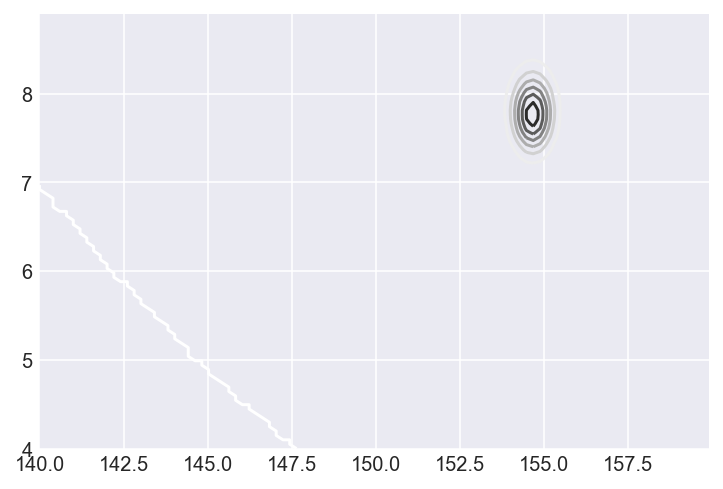

In [219]:
#read notes above when you forget the syntax. The two lines below are just short ways of setting the linspace
#relative to the min and max values for mean and stdev in post
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100) 
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
#griddata from scipy interpolates unstructured data. We only know a few points, but we need lots more
zi = griddata((post[:,0], post[:,1]), #all of the mus, all of the sigmas
              post_prob,  # posterior probability from above 
              (xi[None,:], yi[:,None])) # this has something to do with the width of the interpolated data

plt.contour(xi, yi, zi);

In [ ]:
# abandoning the heatmap for now. maybe revisit later.

In [237]:
post_prob

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.79889318e-30, 1.39924384e-29, 2.25469704e-29])

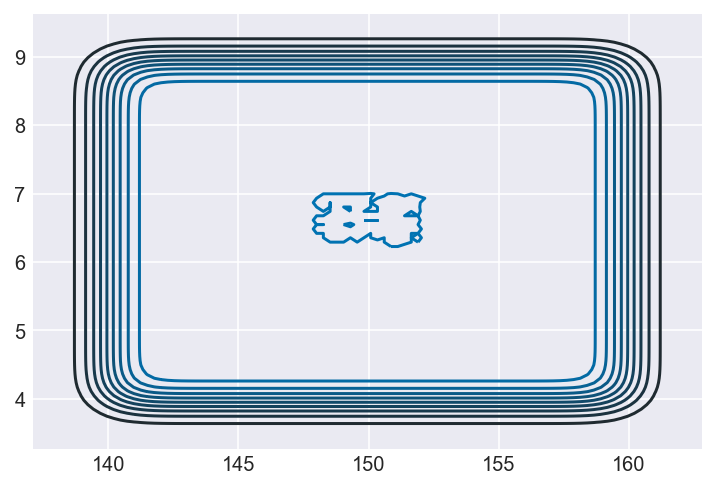

In [247]:
sns.kdeplot(post[:,0], post[:,1])

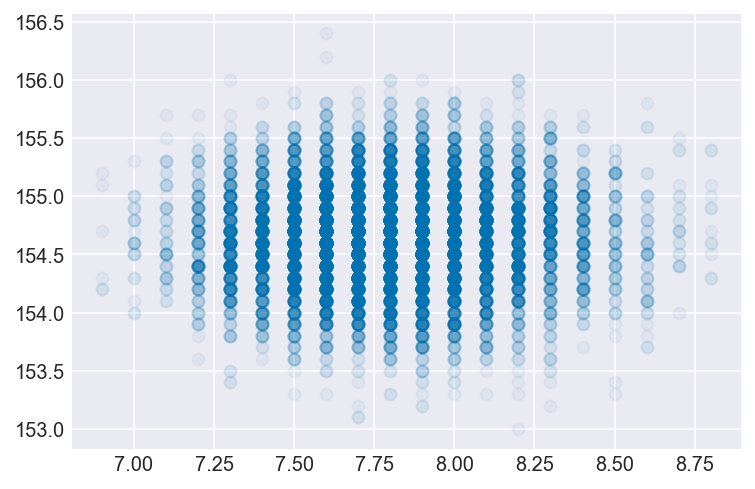

In [278]:
#R code 4.20
sample_rows = np.random.choice(len(post), p=post_prob/post_prob.sum(), size=10000)
sample_mu = post[sample_rows][:,1]
sample_sigma = post[sample_rows][:,0]
plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)

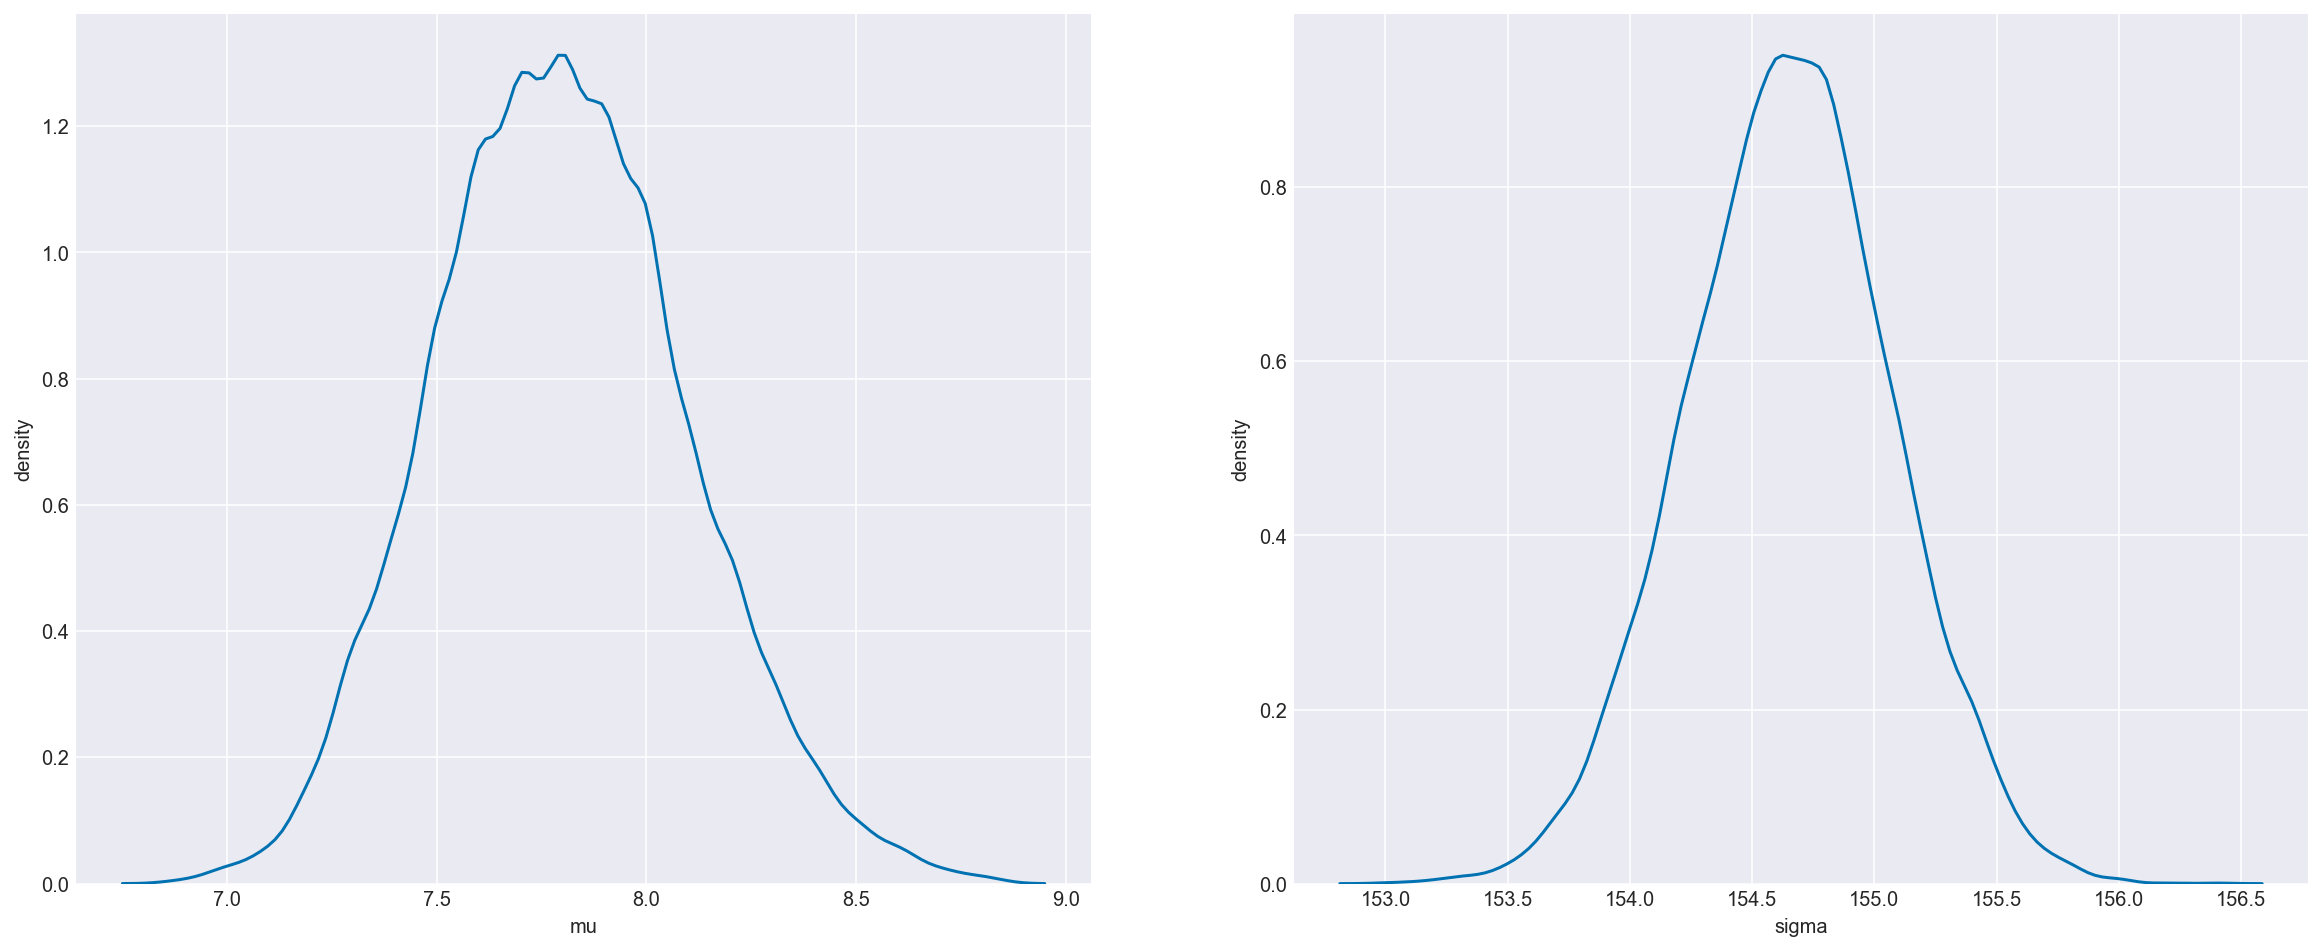

In [287]:
#R code 4.21

fig_3 = plt.figure(2, figsize=(20, 8))
chart_5 = fig_3.add_subplot(121)
chart_5.set_ylabel('density')
chart_5.set_xlabel('mu')

chart_6 = fig_3.add_subplot(122)
chart_6.set_ylabel('density')
chart_6.set_xlabel('sigma')

sns.kdeplot(sample_mu, ax=chart_5)
sns.kdeplot(sample_sigma, ax=chart_6);

plt.show()

In [284]:
#R code 4.22
narrowest_50 = pm.hpd(sample_sigma, alpha=0.5)
narrowest_50
#and so forth

array([154.3, 154.8])

In [290]:
#OK, this is where things start getting different between python and R. I'm just going to go with it. 
#It has to do with the QUAP method the prof wrote in R. There are other methods in python, namely pm.Model():

with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20) #setting the priors for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50) #setting priors for sigma
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height) #this takes mu, sigma, and data as parameters

In [291]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000) #Sampling from the posterior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1428.28draws/s]


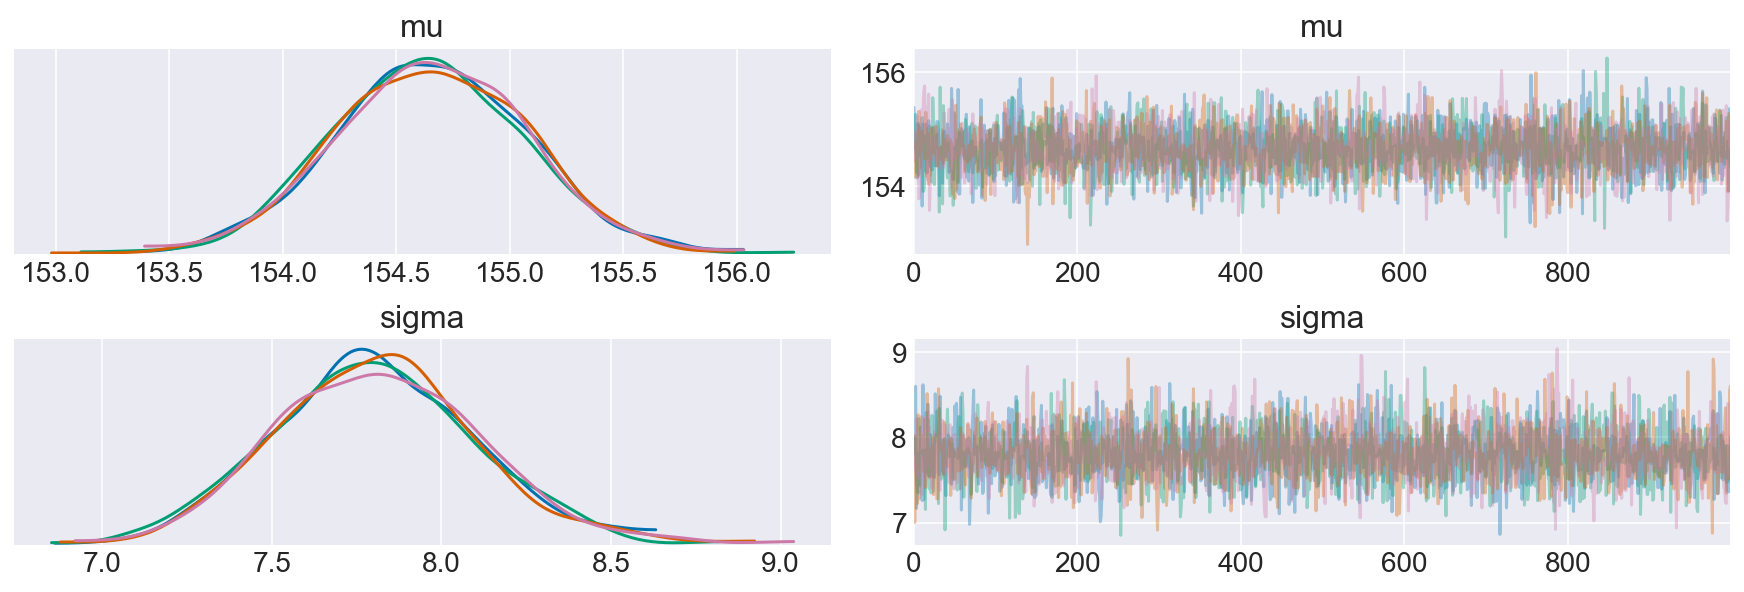

In [293]:
pm.traceplot(trace_4_1);

In [297]:
#R code 4.29
pm.summary(trace_4_1, alpha = 0.11).round(2) #if no alpha is specified, the default is 0.05
#this renders my precis formula useless. But it was a fun ride.

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.65,0.42,0.01,153.98,155.29,3946.31,1.0
sigma,7.81,0.30,0.00,7.34,8.29,4292.97,1.0


In [298]:
#R code 4.31

with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1) #different sd for mu this time
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000) #Sampling from the posterior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:04<00:00, 1777.04draws/s]


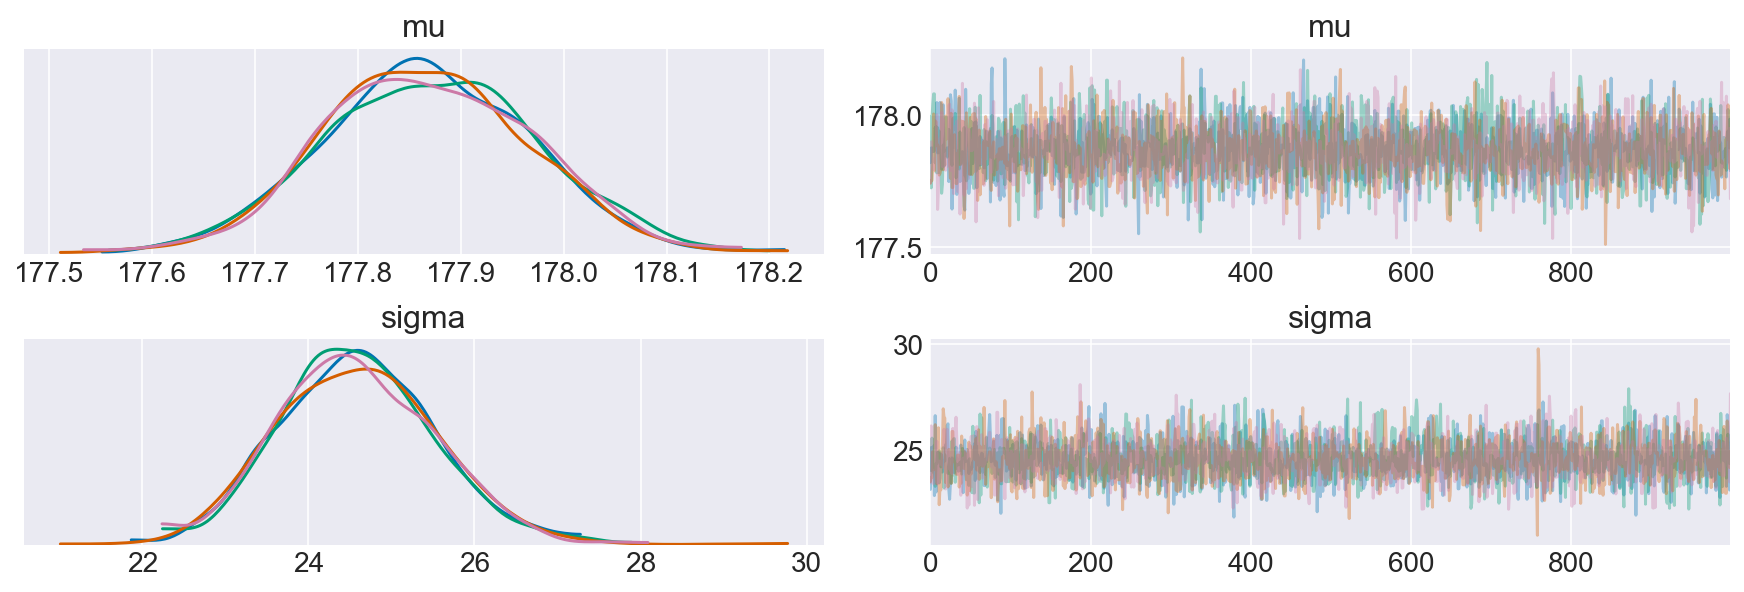

In [302]:
#R code 4.31, cont'd

pm.summary(trace_4_2, alpha = 0.11).round(2)
pm.traceplot(trace_4_2);

#The posterior for sigma has changed a lot! This is because we defined mu very narrowly (sd=0.1)
#so the model caused a different posterior for sigma, even though we didn't change anything about sigma's prior

In [303]:
#R code 4.32
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.173908,-0.001018
sigma,-0.001018,0.089279


In [304]:
#R code 4.33
np.diag(trace_df.cov())
#this is a vector of variances for the parameters

array([0.17390798, 0.08927858])

In [305]:
#R code 4.33, cont'd
trace_df.corr()

#this shows how correlated the two paramaters are, based on the trace done on the posterior samples
#we expect mu to be perfectly correlated with mu, and sigma with sigma. The other values, being closer to zero,
#indicate that there is no correlation between mu and sigma; not surprising for this model.

,mu,sigma
mu,1.00000,-0.00817
sigma,-0.00817,1.00000


In [306]:
#R code 4.34
#we already have samples from the posterior, so we can just look at them
trace_df.head()

,mu,sigma
0,155.385315,7.804858
1,154.669868,7.834812
2,154.763749,8.598658
3,154.557079,7.166929
4,154.144044,7.356779


In [317]:
#If we just want sigma values from the traces, we can use:
trace_4_1['sigma'][:10] #if we want 10

array([7.80485795, 7.83481168, 8.59865792, 7.16692869, 7.35677867,
       7.59277366, 7.80926782, 7.4451151 , 8.12024048, 7.55282879])

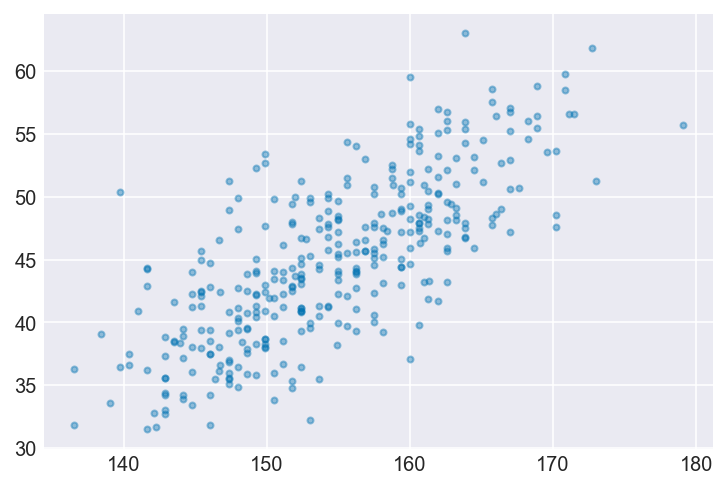

In [322]:
#R code 4.37
plt.plot(d2['height'], d2['weight'], '.', alpha = 0.4);

In [324]:
d2.weight.mean()

45.04554285549132

In [331]:
#There's an error in the guide I'm following where they forget to subtract d2.weight.mean() from the mu term
with pm.Model() as m4_3:
    alpha = pm.Normal('mu', mu=178, sd=20) #this is now the old model for the simple height mean
    beta = pm.Normal('beta', mu=0, sd=10) #distribution for coefficients beta
    mu = alpha + beta*(d2.weight - d2.weight.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000) #Sampling from the posterior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, mu]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1551.35draws/s]


In [332]:
pm.summary(trace_4_3, alpha = 0.11).round(2)
#pm.traceplot(trace_4_3);

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.65,0.27,0.0,154.25,155.10,5593.41,1.0
beta,0.91,0.04,0.0,0.84,0.98,6415.37,1.0
sigma,5.14,0.20,0.0,4.84,5.46,6692.52,1.0


In [336]:
trace_4_3_df = pm.trace_to_dataframe(trace_4_3)
#trace_4_3_df.cov()
#np.diag(trace_4_3_df.cov())
trace_4_3_df.corr()


,mu,beta,sigma
mu,1.000000,0.007107,0.020264
beta,0.007107,1.000000,-0.027933
sigma,0.020264,-0.027933,1.000000


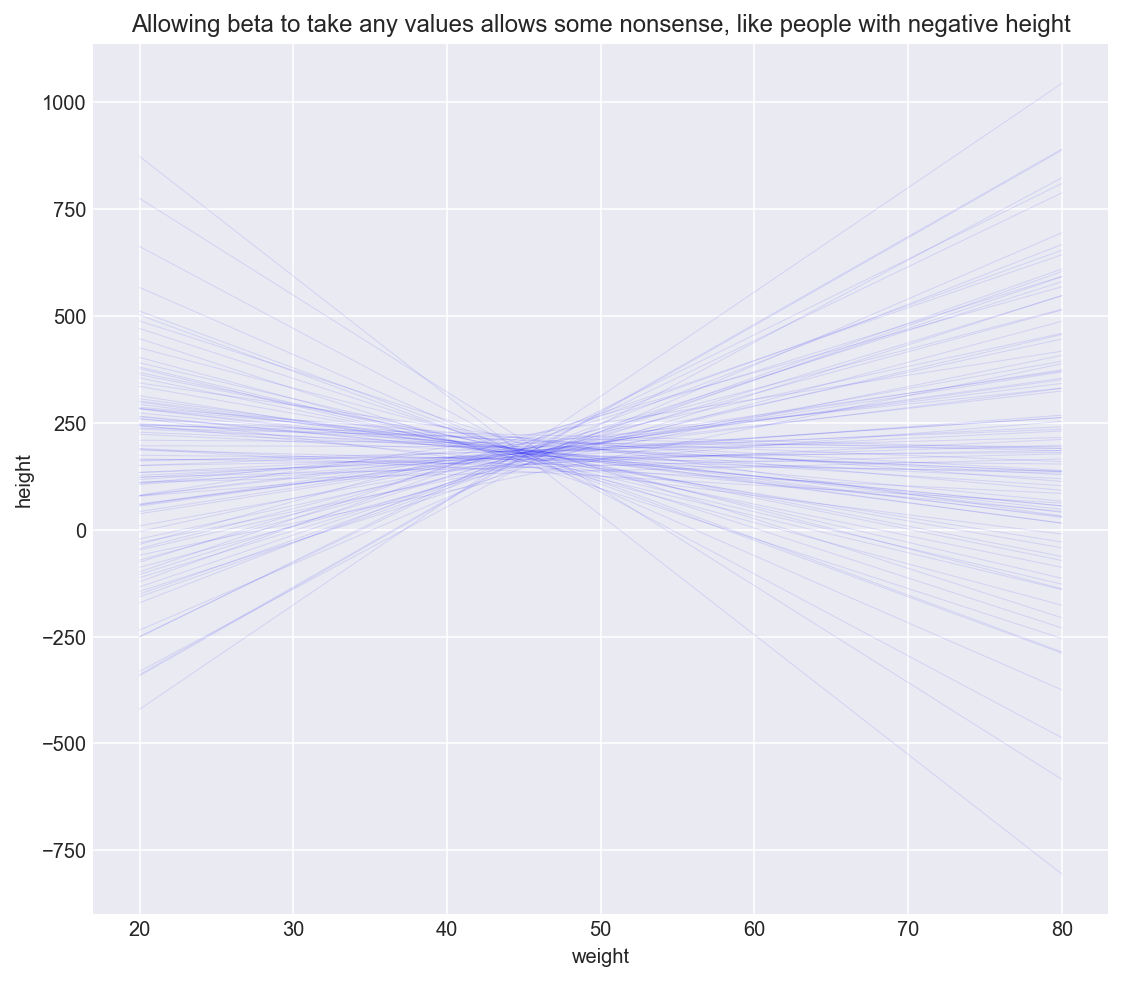

In [384]:
n_lines = 100
a = stats.norm.rvs(loc=178, scale=20, size=n_lines)
b = stats.norm.rvs(loc=0, scale = 10, size=n_lines)
x = np.linspace(20, 80, 1000) 


fig_4 = plt.figure(2, figsize=(20, 8))
chart_7 = fig_4.add_subplot(111)
chart_7.set_ylabel('height')
chart_7.set_xlabel('weight')
chart_7.set_title('Allowing beta to take any values allows some nonsense, like people with negative height')

k = 0
while k<len(a):
    chart_7.plot(x, a[k] + b[k]*(x-d2.weight.mean()), linewidth=0.5, alpha=0.1, color='b')
    k += 1
plt.show()

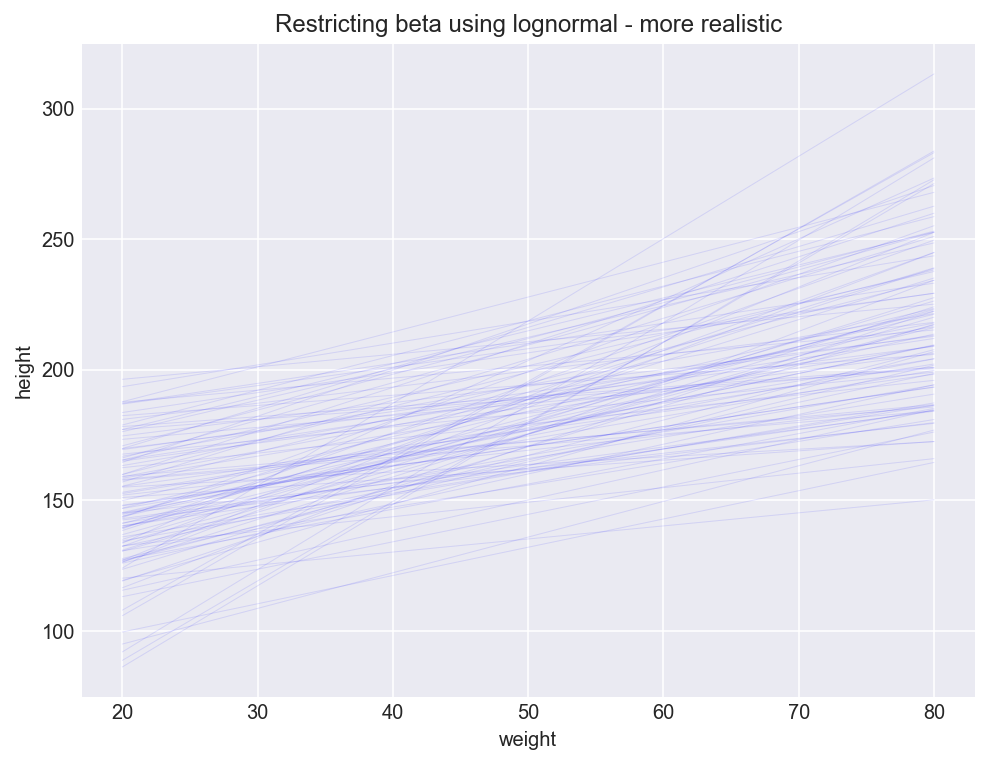

In [390]:
n_lines = 100
a = stats.norm.rvs(loc=178, scale=20, size=n_lines)
b = stats.lognorm(0.5, loc=0, scale = 1).rvs(size=n_lines) # this is wrong - left off here
x = np.linspace(20, 80, 1000) 

fig_5 = plt.figure(2, figsize=(8,6))
chart_8 = fig_5.add_subplot(111)
chart_8.set_ylabel('height')
chart_8.set_xlabel('weight')
chart_8.set_title('Restricting beta using lognormal - more realistic')

k = 0
while k<len(a):
    chart_8.plot(x, a[k] + b[k]*(x-d2.weight.mean()), linewidth=0.5, alpha=0.1, color='b')
    k += 1
plt.show()

In [418]:
with pm.Model() as m4_4:
    alpha = pm.Normal('alpha', mu=178, sd=20) 
    beta = pm.Lognormal('beta', mu=0, sd=1) #lognormal values now instead of normal, guarantees b>1, intuitive as height and weight are positively correlated
    mu = alpha + beta*(d2.weight - d2.weight.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_4 = pm.sample(1000, tune=1000) #Sampling from the posterior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1532.25draws/s]


In [419]:
#R code 4.44
pm.summary(trace_4_4, alpha = 0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
alpha,154.65,0.28,0.0,154.18,155.07,5626.46,1.0
beta,0.90,0.04,0.0,0.84,0.97,6473.90,1.0
sigma,5.15,0.20,0.0,4.84,5.46,6516.85,1.0


In [420]:
#R code 4.45
#very little covariance
trace_4_4_df = pm.trace_to_dataframe(trace_4_4)
trace_4_4_df.cov()
#np.diag(trace_4_4_df.cov())
#trace_4_4_df.corr()

,alpha,beta,sigma
alpha,0.078450,-0.000193,-0.000269
beta,-0.000193,0.001890,0.000252
sigma,-0.000269,0.000252,0.039499


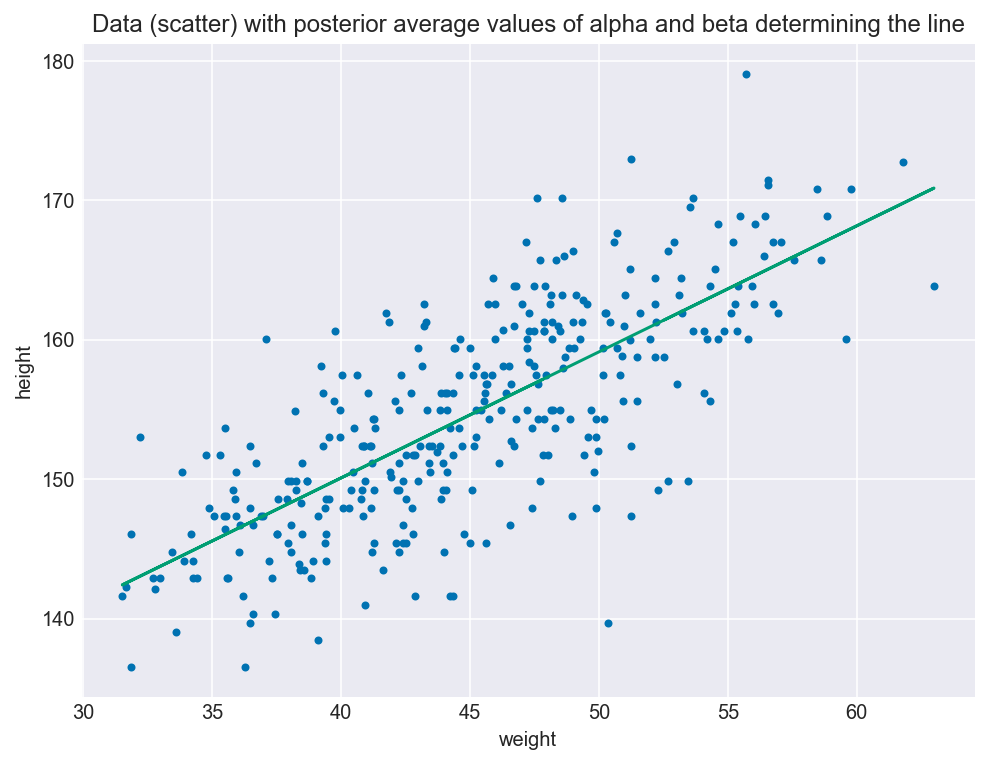

In [429]:
#R code 4.46
a_mean = trace_4_4['alpha'].mean()
b_mean = trace_4_4['beta'].mean()

figure_5 = plt.figure(figsize=(8,6))
chart_9 = figure_5.add_subplot(111)
chart_9.plot(d2.weight, d2.height, '.')
chart_9.set_xlabel('weight')
chart_9.set_ylabel('height');
chart_9.set_title('Data (scatter) with posterior average values of alpha and beta determining the line')
chart_9.plot(d2.weight, (a_mean + b_mean*(d2.weight-d2.weight.mean())));

In [513]:
#R code 4.48, ran several times with N data points to inform the model by doing d2.weight[:N]
with pm.Model() as m4_4:
    alpha = pm.Normal('alpha', mu=178, sd=20) 
    beta = pm.Lognormal('beta', mu=0, sd=1) #lognormal values now instead of normal, guarantees b>1, intuitive as height and weight are positively correlated
    mu = alpha + beta*(d2.weight - d2.weight.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_4 = pm.sample(1000, tune=1000) #Sampling from the posterior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:04<00:00, 1625.94draws/s]


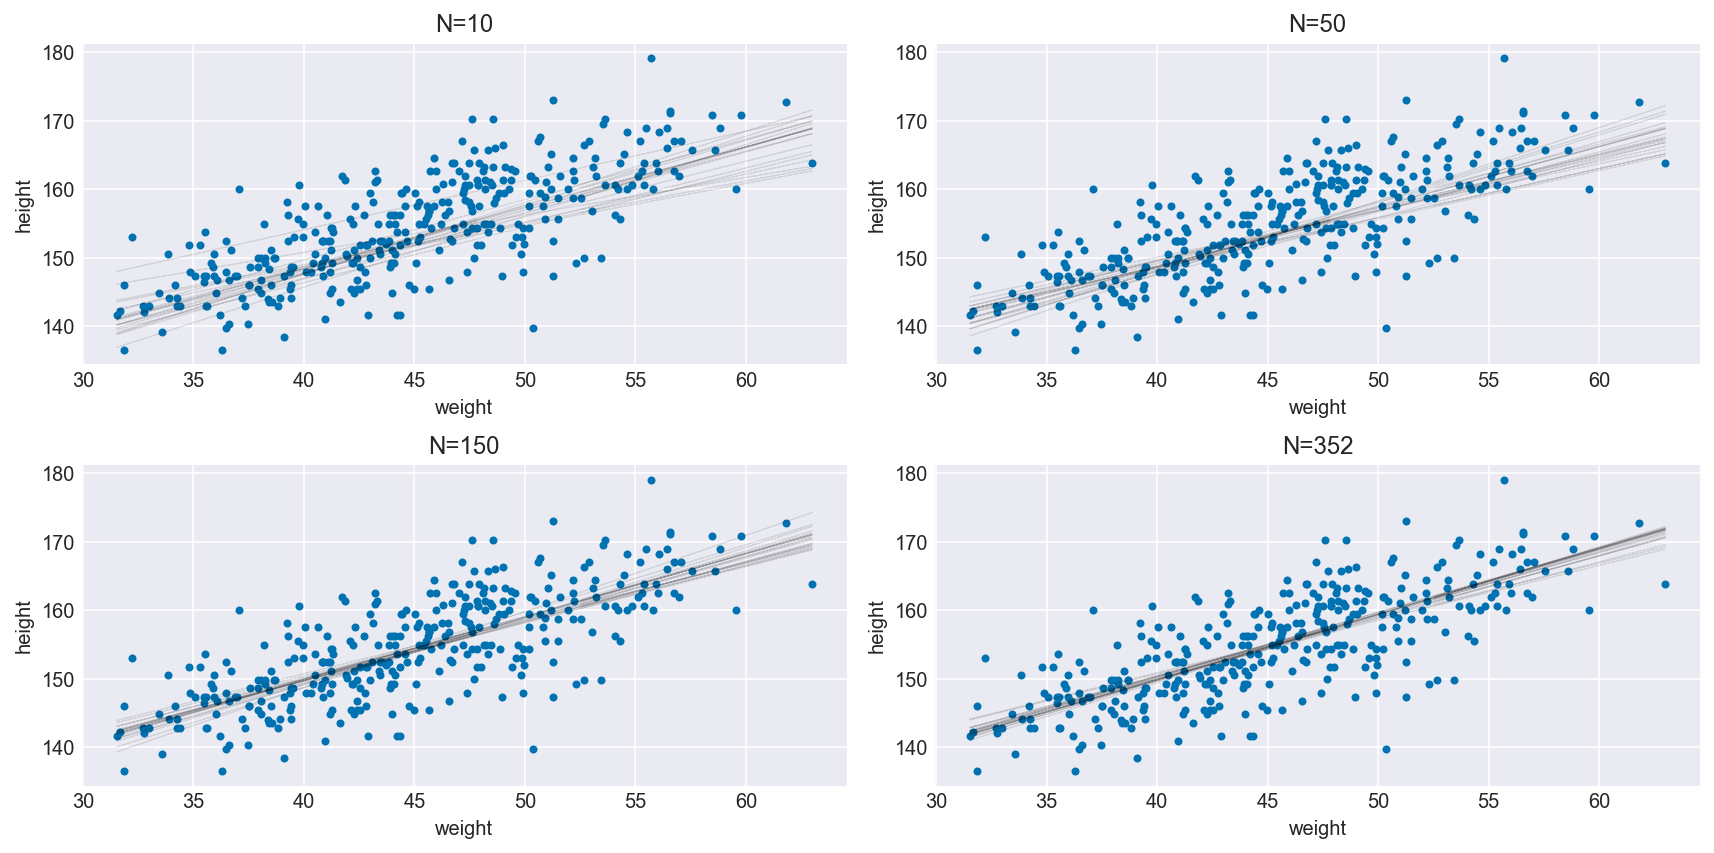

In [518]:
#R code 4.49, figure 4.7
figure_5 = plt.figure(figsize=(12,6))
chart_9 = figure_5.add_subplot(221)
chart_9.plot(d2.weight, d2.height, '.')
chart_9.set_xlabel('weight')
chart_9.set_ylabel('height');
chart_9.set_title('N=10')

chart_10 = figure_5.add_subplot(222)
chart_10.plot(d2.weight, d2.height, '.')
chart_10.set_xlabel('weight')
chart_10.set_ylabel('height');
chart_10.set_title('N=50')

chart_11 = figure_5.add_subplot(223)
chart_11.plot(d2.weight, d2.height, '.')
chart_11.set_xlabel('weight')
chart_11.set_ylabel('height');
chart_11.set_title('N=150')

chart_12 = figure_5.add_subplot(224)
chart_12.plot(d2.weight, d2.height, '.')
chart_12.set_xlabel('weight')
chart_12.set_ylabel('height');
chart_12.set_title('N=352')

k=0
lines_to_simulate = 20
while k < lines_to_simulate:
    chart_9.plot(d2.weight, (trace_4_4_10['alpha'][k] + trace_4_4_10['beta'][k]*(d2.weight-d2.weight.mean())),
                 linewidth=0.5, alpha=0.1, color='k');
    chart_10.plot(d2.weight, (trace_4_4_50['alpha'][k] + trace_4_4_50['beta'][k]*(d2.weight-d2.weight.mean())),
                 linewidth=0.5, alpha=0.1, color='k');
    chart_11.plot(d2.weight, (trace_4_4_150['alpha'][k] + trace_4_4_150['beta'][k]*(d2.weight-d2.weight.mean())),
                 linewidth=0.5, alpha=0.1, color='k');
    chart_12.plot(d2.weight, (trace_4_4_352['alpha'][k] + trace_4_4_352['beta'][k]*(d2.weight-d2.weight.mean())),
                 linewidth=0.5, alpha=0.1, color='k');
    
    k+=1
figure_5.tight_layout()

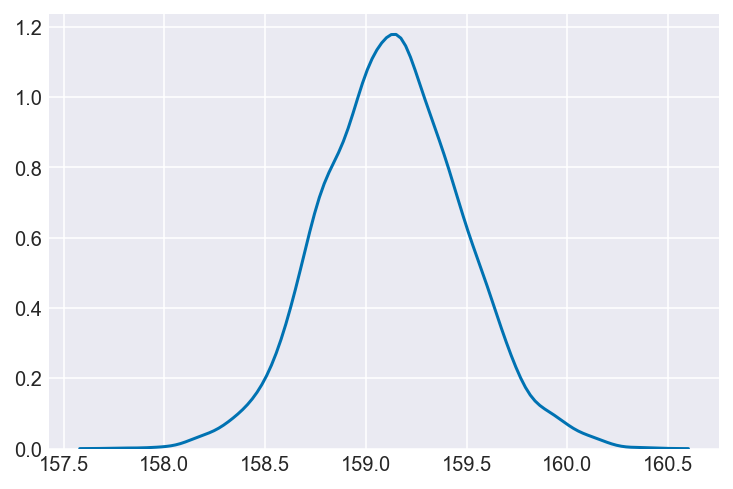

In [528]:
#R code 4.50, 4.50
#mean_at_50 contains an array of 4000 values (number of samples in trace_4_4) where 
#I calculated the average height given a weight of 50 kg. Because this value comes from
#the posterior, it includes uncertainty about alpha and beta.

mean_at_50 = trace_4_4['alpha'] + trace_4_4['beta']*(50-d2.weight.mean())
sns.kdeplot(mean_at_50);

In [532]:
#R code 4.52
np.percentile(mean_at_50, [5.5,94.5])

# pm.summary(trace_4_4, alpha = 0.11).round(2)
# trace_4_4_df = pm.trace_to_dataframe(trace_4_4)
# trace_4_4_df.cov()
# np.diag(trace_4_4_df.cov())



159.5568004697418